In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

In [7]:
sr = 8000
files = ["auds/set2.wav","auds/speech.wav"]
d = [librosa.load(file,sr)[0] for file in files]

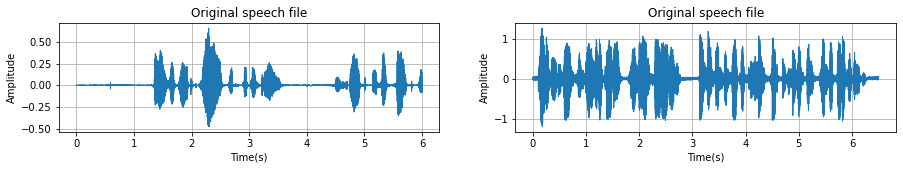

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,2))
for i,di in enumerate(d):
    t=np.linspace(0,len(di)/sr,len(di))
    ax[i].plot(t,di, lw=1)
    ax[i].set_xlabel('Time(s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].set_title('Original speech file')
    ax[i].grid(True)
plt.show()

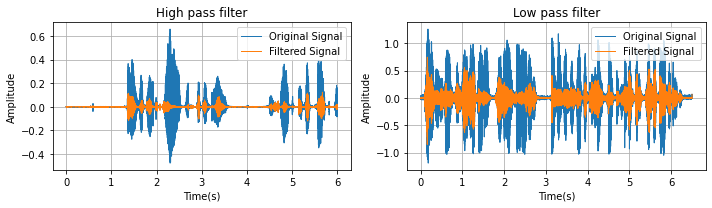

In [9]:
b, a = signal.butter(4, 2000. / (sr / 2.), 'high')
d_high = signal.filtfilt(b, a, d[0])

b, a = signal.butter(4, 500. / (sr / 2.), 'low')
d_low = signal.filtfilt(b, a, d[1])

fig, ax = plt.subplots(1, 2, figsize=(10, 3),tight_layout=True)
for i, (original,filtered) in enumerate(zip(d,[d_high,d_low])):
    t = np.linspace(0., len(original) / sr, len(original))
    ax[i].plot(t, original, lw=1,label="Original Signal")
    ax[i].plot(t, filtered, lw=1,label="Filtered Signal")
    ax[i].set_xlabel('Time(s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].grid(True)
    ax[i].legend(loc=1)

ax[0].set_title('High pass filter')
ax[1].set_title('Low pass filter')

plt.show()